# Fitting a function to histogram

In the exercise we will fit a relativistic Breit-Wigner probability distribution function to a peak in invariant mass histogram. From the parameters of the fitted function, it is then possible to determine the mass and lifetime of the particle that the peak represents.

The relativistic Breit-Wigner function is a common distribution used in the field of high-energy physics. The probability density function writes as:

$$
f(E) = \frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the distribution and $K$ a constant that can be expressed as:

$$
K = \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}}
$$

If we also want to include the background events to the fit, we must add additional parameters $a$, $b$ and $A$ to the distribution function. Together with the background event parameters, the probability density function becomes

$$
f(E) = aE+b+A\frac{K}{(E^2-M^2)^2 + M^2 \Gamma^2},
$$

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant. This relation is based on the uncertainty principle $\Delta E \Delta t \gtrsim \hbar $, which states that we cannot know exactly both the energy and lifetime of a particle. Therefore, the shorter the lifetime, the greater the uncertainty in energy.

## Exercises

In this exercise, we will use dataset **"DoubleMuRun2011A.csv"**. Your task is to plot the invariant masses of the events in the dataset, fit Breit-Wigner function to a peak and determine the mass and lifetime of the particle. Here is a summary what you should do.

1. Plot the invariant mass histogram from the data in **"DoubleMuRun2011A.csv"** using 100 bins. The invariant masses are already calculated and are saved to column called "M".
1. **Check** which **range** you should use for fitting the distribution function from Moodle exercise **"Week 3 coding questions"**. Then plot invariant mass histogram on that range.
1. Define a function **bin_centers(bins_edges)** that takes a list of evenly spaced bin edges as arguments and returns the bin centers. **Submit** your **solution** to Moodle exercise **"Bin centers"**.
1. Define a function **breitwigner(E, gamma, M, a, b, A)** that returns the value of the relativistic Breit-Wigner probability density function. **Submit** your **solution** to Moodle exercise **"Breit-Wigner distribution"**.
1. Fit Breit-Wigner -function to the peak using bin centers as xdata and bin heights as ydata.
1. Find solutions to the questions in Moodle exercise **"Week 3 coding questions"**.

### Part 1: Invariant mass, bin centers and Breit-Wigner distribution

Plot the invariant masses in file "DoubleMuRun2011A.csv". Use 100 bins.

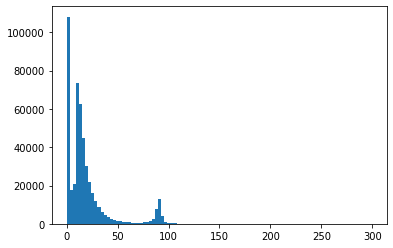

In [17]:
# solution

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

nbins = 100
data = pd.read_csv("DoubleMuRun2011A.csv")
heights, bins, patches = plt.hist(data.M, bins=nbins)
plt.show()

As you can probably see, the histogram is quite hard to read. However, we can see that there are some some interesting peaks that we might want to look more closely. Check which the invariant mass range which you should focus on from Moodle exercise **"Week 3 coding questions"**. Then plot invariant mass histogram on that range. Again, use 100 bins. Save the bin edges and bin heights to variables (they are return values of plt.hist()).

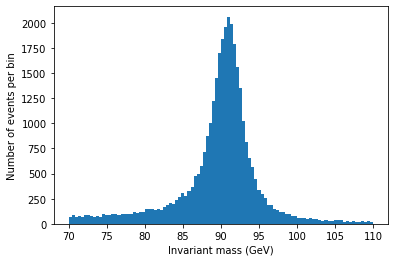

In [28]:
# solutions for Z boson

lower_limit = 70
upper_limit = 110

plt.figure()
heights, bin_edges, patches = plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('Number of events per bin')
plt.show()

Now you should be able to see a single peak. Your task is to fit a Breit-Wigner distribution function to this peak. For better results, we want to fit the function using bin centers as our xdata and bin heights as our ydata. We got bin heights and bin edges from plt.hist() as return values. Therefore, we need to transform the bin edges to bin centers.

Write a function **bin_centers(bins_edges)** that takes a list of evenly spaced bin edges as arguments and returns the bin centers. **Submit** your **solution** to Moodle exercise **"Bin centers"**.

In [24]:
# solution

def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")

Before we can do the function fitting, we still need to define the Breit-Wigner function.

Write a function **breitwigner(E, gamma, M, a, b, A)** that returns the value of the relativistic Breit-Wigner probability density function. **Submit** your **solution** to Moodle exercise **"Breit-Wigner distribution"**.

In [20]:
# possible solution

def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

### Part 2 - Fitting Breit-Wigner distribution to histogram

First, use your bin_centers()-function to transform the bin edges to bin centers.

Finally, it is time to fit the distribution function to the histogram. Use **curve_fit()**-function from scipy.optimize module and find the optimal parameters for the Breit-Wigner distribution. Note that you need some initial guess to get any reasonable optimized parameters from curve_fit function. Approximate your initial guesses for $M$ and $\Gamma$ from the histogram. For the background parameters, you can use for example the following guesses: $a=1$, $b=A=100$. You should perform the optimization multiple times by using the optimized coefficients from previous iteration as your initial guess. By doing so, you will get more accurate results.

In [75]:
# solution for Z-boson

bins = bin_centers(bin_edges)

accuracy = 1e-5
p0 = [4, 90, 1, 100, 100]
while True: # Loop until desired accuracy
    best, covariance = curve_fit(breitwigner, bins, heights, p0=p0)
    error = max(abs(p0-best))
    if error < accuracy: 
        break
    p0 = best

print(best)

[ 4.23265425e+00  9.08774555e+01 -2.13118848e+00  1.99979981e+02
  1.38302577e+04]


Once you have the optimized parameters, plot the fitted function and the initial histogram to confirm that the fit is good. If the function doesn't seem to describe the histogram well, try using different initial guess or more iterations to find optimal parameters. 

Print the parameters and their errors ( np.sqrt(np.diag(covariance)), where covariance is returned by curve_fit -function ).

gamma = 4.233 +/- 0.053
M     = 90.877 +/- 0.016
a     = -2.131 +/- 0.272
b     = 199.980 +/- 24.776
A     = 13830.258 +/- 143.999


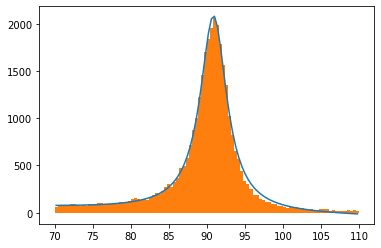

In [77]:
# Solution for Z boson

plt.plot(bins, breitwigner(np.array(bins), *best))
plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
errors = np.sqrt(np.diag(covariance))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best[i],errors[i],param_strings[i]))
plt.show()

Now that you have a function that represents the data well, you can use it to estimate the lifetime of the particle.

Calculate the lifetime.

In [78]:
# solution

def lifetime(decayWidth):
    hbar = 6.582119569e-16/1e9 # GeV*s
    return hbar/decayWidth

gamma = best[0]
errgamma = errors[0]
tau = lifetime(gamma)
tauminus = lifetime(gamma-errgamma)
tauplus = lifetime(gamma+errgamma)
error = max(tauminus-tau,tau-tauplus)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau,error))

tau = 1.55508E-25 s +/- 1.95864E-27 s


#### Solution for Upsilon-meson

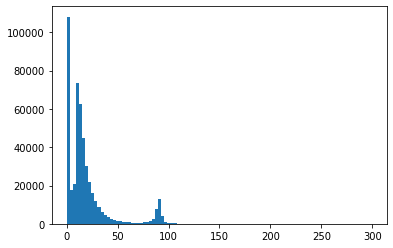

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

nbins = 100
data = pd.read_csv("DoubleMuRun2011A.csv")
heights, bins, patches = plt.hist(data.M, bins=nbins)
plt.show()

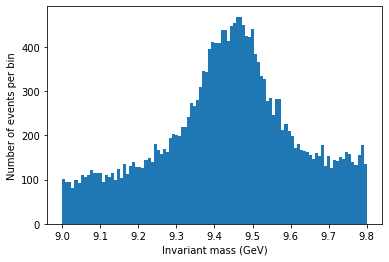

In [80]:
lower_limit = 9
upper_limit = 9.8

plt.figure()
heights, bin_edges, patches = plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('Number of events per bin')
plt.show()

In [82]:
def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")

In [83]:
def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [84]:
bins = bin_centers(bin_edges)

accuracy = 1e-5
p0 = [0.2, 9.5, 1, 100, 100]
while True: # Loop until desired accuracy
    best, covariance = curve_fit(breitwigner, bins, heights, p0=p0)
    error = max(abs(p0-best))
    if error < accuracy: 
        break
    p0 = best

print(best)

[ 2.00075405e-01  9.44985238e+00  3.85844515e+01 -2.73581926e+02
  1.18268365e+02]


gamma = 0.200 +/- 0.006
M     = 9.450 +/- 0.001
a     = 38.584 +/- 7.829
b     = -273.582 +/- 72.678
A     = 118.268 +/- 3.955


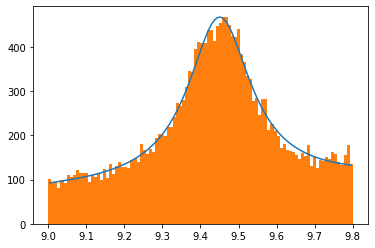

In [86]:
plt.plot(bins, breitwigner(np.array(bins), *best))
plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
errors = np.sqrt(np.diag(covariance))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best[i],errors[i],param_strings[i]))
plt.show()

In [87]:
def lifetime(decayWidth):
    hbar = 6.582119569e-16/1e9 # GeV*s
    return hbar/decayWidth

gamma = best[0]
errgamma = errors[0]
tau = lifetime(gamma)
tauminus = lifetime(gamma-errgamma)
tauplus = lifetime(gamma+errgamma)
error = max(tauminus-tau,tau-tauplus)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau,error))

tau = 3.28982E-24 s +/- 1.06749E-25 s


### Solution for J/psi

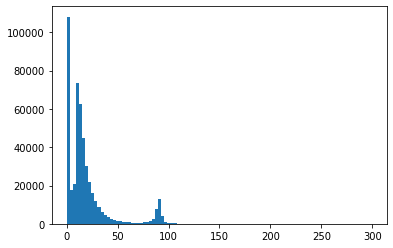

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

nbins = 100
data = pd.read_csv("DoubleMuRun2011A.csv")
heights, bins, patches = plt.hist(data.M, bins=nbins)
plt.show()

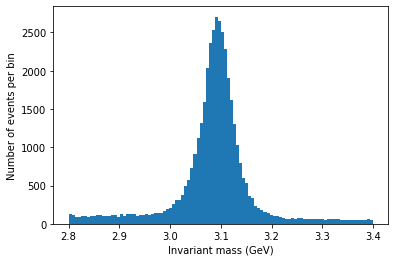

In [89]:
lower_limit = 2.8
upper_limit = 3.4

plt.figure()
heights, bin_edges, patches = plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
plt.xlabel('Invariant mass (GeV)')
plt.ylabel('Number of events per bin')
plt.show()

In [90]:
def bin_centers(bins):
    if len(bins) > 1:
        return [0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)]
    else:
        print("At least two bins are needed.")

In [91]:
def breitwigner(E, gamma, M, a, b, A):
    y = np.sqrt(M**2*(M**2+gamma**2))
    K = 2*np.sqrt(2)*M*gamma*y/(np.pi*np.sqrt(M**2+y))
    return a*E+b+A*(K/((E**2-M**2)**2+M**2*gamma**2))

In [92]:
bins = bin_centers(bin_edges)

accuracy = 1e-5
p0 = [0.1, 3.1, 1, 100, 100]
while True: # Loop until desired accuracy
    best, covariance = curve_fit(breitwigner, bins, heights, p0=p0)
    error = max(abs(p0-best))
    if error < accuracy: 
        break
    p0 = best

print(best)

[ 5.89948911e-02  3.09336071e+00 -9.45886815e+01  2.95304033e+02
  2.59693500e+02]


gamma = 0.059 +/- 0.001
M     = 3.093 +/- 0.000
a     = -94.589 +/- 32.338
b     = 295.304 +/- 100.793
A     = 259.694 +/- 3.628


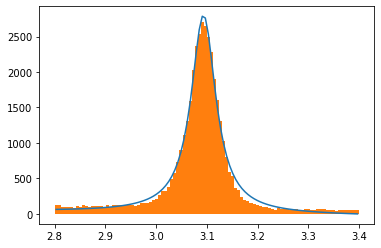

In [93]:
plt.plot(bins, breitwigner(np.array(bins), *best))
plt.hist(data.M, bins=nbins, range=(lower_limit,upper_limit))
errors = np.sqrt(np.diag(covariance))
param_strings = ["gamma","M","a","b","A"]
for i in range(len(best)):
    print("{2:5} = {0:.3f} +/- {1:.3f}".format(best[i],errors[i],param_strings[i]))
plt.show()

In [94]:
def lifetime(decayWidth):
    hbar = 6.582119569e-16/1e9 # GeV*s
    return hbar/decayWidth

gamma = best[0]
errgamma = errors[0]
tau = lifetime(gamma)
tauminus = lifetime(gamma-errgamma)
tauplus = lifetime(gamma+errgamma)
error = max(tauminus-tau,tau-tauplus)
print("tau = {0:.5E} s +/- {1:.5E} s".format(tau,error))

tau = 1.11571E-23 s +/- 1.91593E-25 s
